# Analysis
The analysis is split into two parts because I could not find a similar package to *survey* in R to complete the last two step of the method.  
Fitting the outcome model and obtaining the individual treatment effect is done in R and the final plot for dose response function is done in python here.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from causal_curve import GPS_Regressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/cleaned_data.csv")

In [3]:
df.columns

Index(['Charter', 'Magnet.', 'Title.I.School.', 'locationRural',
       'locationSize', 'Students.', 'SeniorHigh', 'numOfStud2014',
       'meanScale2012', 'lev1Perc2012', 'lev5Perc2012', 'perc.free.lunch',
       'perc.reduced.lunch', 'logLoginsPerExaminee', 'meanScale2014'],
      dtype='object')

In [4]:
df.rename({'Magnet.': 'Magnet', 'Title.I.School.': 'Title_I_School', 'Students.': 'Students', 'perc.free.lunch': 'perc_free_lunch', 'perc.reduced.lunch': 'perc_reduced_lunch'}, axis=1, inplace=True)

In [5]:
df

,Charter,Magnet,Title_I_School,locationRural,locationSize,Students,SeniorHigh,numOfStud2014,meanScale2012,lev1Perc2012,lev5Perc2012,perc_free_lunch,perc_reduced_lunch,logLoginsPerExaminee,meanScale2014
0,0,0,0,0,1,1650,0,0.710319,1.321204,-1.189803,0.907034,-1.100755,-0.354221,0.524586,407.0
1,0,1,1,0,0,638,0,-1.214175,0.339021,-0.853506,-0.424392,1.161868,-1.020642,1.085189,392.0
2,1,0,1,0,0,401,0,-1.416359,-0.553873,0.491685,-0.690677,-0.886782,-2.212551,0.810930,386.0
3,0,0,1,0,1,293,0,-1.633520,-1.536056,1.668728,0.108178,1.897870,0.447725,1.690290,383.0
4,0,0,0,1,2,1684,1,0.328416,1.231914,-0.853506,1.439604,-1.977425,-1.465968,-3.153448,405.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,0,0,0,0,0,2139,0,0.845109,-0.018137,0.155388,0.108178,-0.629733,0.756770,0.984750,398.0
444,0,0,0,0,0,2002,0,0.403299,0.339021,-0.433134,-0.424392,-1.044638,-0.347898,-1.151535,403.0
445,0,1,1,0,0,146,0,-1.626032,0.428310,-1.189803,-0.690677,1.510049,-0.215055,-0.693147,405.0
446,0,0,0,0,2,1094,0,-0.053488,0.874757,-0.853506,1.173319,-0.657297,-0.542195,-5.438079,408.0


***

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as sm

In [7]:
#convert all category items
df['Charter'] = df['Charter'].astype('category')
df['Magnet'] = df['Magnet'].astype('category')
df['Title_I_School'] = df['Title_I_School'].astype('category')
df['locationRural'] = df['locationRural'].astype('category')
df['locationSize'] = df['locationSize'].astype('category')
df['SeniorHigh'] = df['SeniorHigh'].astype('category')

In [8]:
df.dtypes

Charter                 category
Magnet                  category
Title_I_School          category
locationRural           category
locationSize            category
Students                   int64
SeniorHigh              category
numOfStud2014            float64
meanScale2012            float64
lev1Perc2012             float64
lev5Perc2012             float64
perc_free_lunch          float64
perc_reduced_lunch       float64
logLoginsPerExaminee     float64
meanScale2014            float64
dtype: object

In [9]:
formulaDos=  "logLoginsPerExaminee ~ Charter + Magnet + Title_I_School + locationRural + locationSize + Students + SeniorHigh + numOfStud2014 + meanScale2012 + lev1Perc2012 + lev5Perc2012 + perc_free_lunch + perc_reduced_lunch"

## Step 1: Regressed our treatment variable with the covariates.

In [10]:
mod = sm.ols(formula= formulaDos, data=df)
res = mod.fit()

In [11]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     logLoginsPerExaminee   R-squared:                       0.127
Model:                              OLS   Adj. R-squared:                  0.099
Method:                   Least Squares   F-statistic:                     4.493
Date:                  Mon, 05 Jun 2023   Prob (F-statistic):           1.41e-07
Time:                          21:17:17   Log-Likelihood:                -891.58
No. Observations:                   448   AIC:                             1813.
Df Residuals:                       433   BIC:                             1875.
Df Model:                            14                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.6589      0.415     -4.002      0.000      -2.474      -0.844
Charter[T.1]           -0.0611      0.341     -0.179      0.858      -0.731       0.609
Magnet[T.1]             0.5694      0.205      2.773      0.006       0.166       0.973
Title_I_School[T.1]    -0.0026      0.215     -0.012      0.990      -0.426       0.421
locationRural[T.1]     -0.1508      0.299     -0.505      0.614      -0.738       0.437
locationSize[T.1]      -0.0154      0.270     -0.057      0.955      -0.547       0.516
locationSize[T.2]      -0.3346      0.242     -1.383      0.167      -0.810       0.141
SeniorHigh[T.1]        -0.1477      0.264     -0.559      0.576      -0.667       0.371
Students                0.0010      0.000      4.251      0.000       0.001       0.001
numOfStud2014          -0.5500      0.165     -3.329      0.001      -0.875      -0.225
meanScale2012          -0.5786      0.415     -1.394      0.164      -1.395       0.237
lev1Perc2012           -0.3782      0.345     -1.096      0.273      -1.056       0.300
lev5Perc2012            0.0933      0.158      0.591      0.555      -0.217       0.404
perc_free_lunch         0.0486      0.136      0.357      0.722      -0.219       0.316
perc_reduced_lunch      0.1329      0.096      1.388      0.166      -0.055       0.321
==============================================================================
Omnibus:                       48.146   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.987
Skew:                          -0.844   Prob(JB):                     5.71e-14
Kurtosis:                       3.645   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
#get results
residuals = res.resid
fitted = res.fittedvalues

***

## Step 2: Obtain the GPS

In [13]:
from scipy import stats

In [14]:
df['GPS'] = stats.norm.pdf(x = df['logLoginsPerExaminee'], loc= fitted, scale= np.std(residuals))

In [15]:
# created strata to do covariate balancing
df['strataGPS'] = pd.qcut(df['GPS'], q=5, labels=False, duplicates='raise')
df['strataGPS'] = df['strataGPS'].astype('category')

In [16]:
df.dtypes

Charter                 category
Magnet                  category
Title_I_School          category
locationRural           category
locationSize            category
Students                   int64
SeniorHigh              category
numOfStud2014            float64
meanScale2012            float64
lev1Perc2012             float64
lev5Perc2012             float64
perc_free_lunch          float64
perc_reduced_lunch       float64
logLoginsPerExaminee     float64
meanScale2014            float64
GPS                      float64
strataGPS               category
dtype: object

In [17]:
covariateNames = ["Charter", #dummy indicator of charter school
                   "Magnet", #dummy indicator of magnet school
                   "Title_I_School", #dummy indicator of title 1 school
                   "locationRural",  #rural location
                   "locationSize", #size of location (large, midsize, small)
                   "Students", #total number of students in 2012
                   "SeniorHigh" ,    #dummy indicator of whether it is a senior high school (the reference group is high school                          
                   "numOfStud2014", #number of test takers in 2014 
                   "meanScale2012", #mean scaled scores in 2012
                   "lev1Perc2012",#percent achieving level 1 in 2012
                   "lev5Perc2012", #percent achieving level 5 in 2012
                   "perc_free_lunch", #percent free lunch in 2012
                   "perc_reduced_lunch"] #percent reduced lunch in 2012

In [18]:
# balanceTable = pd.DataFrame(columns=['variables', 'coef'])

# for var in covariateNames:
#     # Formula with treatment dose as a function of covariate
#     balanceFormula = "logLoginsPerExaminee ~ strataGPS + " + var

#     # Regress dose on covariate without weights
#     model = sm.ols(formula=balanceFormula, data=df)
#     results = model.fit()
#     maxEff = max(abs(results.params[5:]))
#     table_data = pd.DataFrame({'variables': [var], 'coef': [maxEff]})
#     balanceTable = pd.concat([balanceTable, table_data])

In [19]:
# balanceTable['coef'] =  balanceTable['coef']/ np.std(df['logLoginsPerExaminee'])


In [20]:
# balanceTable

In [21]:
balanceTablenew = pd.DataFrame(columns=['Variables', 'Baseline', 'GPS Strata'])

for var in covariateNames:
    # Formula with treatment dose as a function of covariate
    balanceFormula = "logLoginsPerExaminee ~ strataGPS + " + var

    # Regress dose on covariate without weights (GPS Strata)
    model = sm.ols(formula=balanceFormula, data=df)
    results = model.fit()
    maxEff = max(abs(results.params[5:]))

    # Regress dose on covariate (baseline)
    balanceFormulabase = "logLoginsPerExaminee ~  " + var
    modelbase = sm.ols(formula=balanceFormulabase, data=df)
    resultsbase = modelbase.fit()
    maxEffbase = max(abs(resultsbase.params[1:]))


    table_data = pd.DataFrame({'Variables': [var], 'Baseline': [maxEffbase], 'GPS Strata':[maxEff]})
    balanceTablenew = pd.concat([balanceTablenew, table_data])

In [22]:
balanceTablenew['Baseline'] =  balanceTablenew['Baseline']/ np.std(df['logLoginsPerExaminee'])
balanceTablenew['GPS Strata'] =  balanceTablenew['GPS Strata']/ np.std(df['logLoginsPerExaminee'])


In [23]:
balanceTablenew = round(balanceTablenew,3)
balanceTablenew.to_csv('data/Cov_Balance_table.csv', index=False)

### Covariate balance result

In [24]:
balanceTablenew

,Variables,Baseline,GPS Strata
0,Charter,0.322,0.346
0,Magnet,0.460,0.319
0,Title_I_School,0.105,0.024
0,locationRural,0.322,0.034
0,locationSize,0.398,0.215
0,Students,0.000,0.000
0,SeniorHigh,0.064,0.000
0,numOfStud2014,0.106,0.038
0,meanScale2012,0.117,0.077
0,lev1Perc2012,0.108,0.064


***

In [25]:
#Clean data with GPS and GPS strata includes
df.to_csv('data/cleaned_data_GPS.csv',index=False)

## Step 3 & Step 4 This part is done in R, please refer to `Analysis2.R`

## Final Dose Response Plotting
This takes in the doseResponses calculated from R to do the final Plotting

In [26]:
# the original replicated outcome model as the textbook includes qudratic terms and interaction as well
doseResponse = pd.read_csv("data/doseResponses.csv")

In [27]:
# get every 10th Percentile
df2 = doseResponse.iloc[9:]
df2 = df2.iloc[::10,:]
df2 = df2.drop(['percentile'], axis = 1)
df2 = df2.rename(columns={'Unnamed: 0': 'Percentile'})
round(df2,4)

,Percentile,logLoginsPerExaminee,meanScale2014,SE,lowerCL,upperCL
9,10%,-2.9014,395.2411,2.6808,389.9867,400.4955
19,20%,-1.2459,397.0403,0.9809,395.1177,398.9629
29,30%,-0.5532,397.5792,1.0230,395.5741,399.5844
39,40%,-0.1112,397.8572,1.0491,395.8010,399.9133
49,50%,0.2966,398.0680,1.0185,396.0717,400.0643
59,60%,0.6664,398.2214,0.9445,396.3701,400.0727
69,70%,1.0840,398.3514,0.8429,396.6992,400.0035
79,80%,1.4577,398.4288,0.8179,396.8257,400.0318
89,90%,1.8349,398.4697,0.9671,396.5742,400.3651
99,100%,3.2243,398.2975,3.0402,392.3387,404.2563


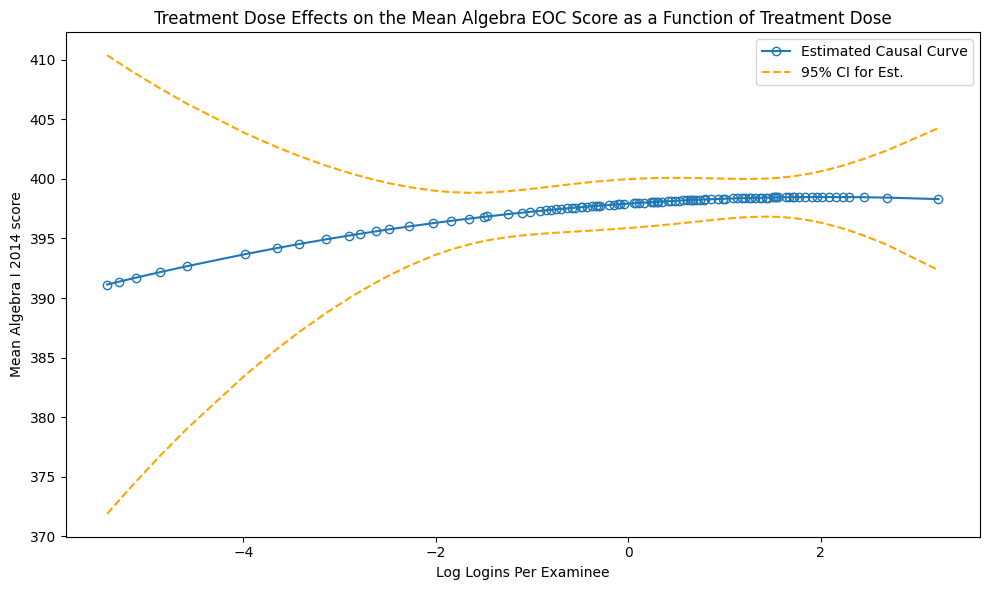

In [28]:
plt.figure(figsize=(10,6))
plt.plot(doseResponse['logLoginsPerExaminee'],doseResponse['meanScale2014'], marker='o',label='Estimated Causal Curve', fillstyle = None,markerfacecolor='none')
plt.plot(doseResponse['logLoginsPerExaminee'],doseResponse['lowerCL'], ls = '--', color = "orange", label = "95% CI for Est.")
plt.plot(doseResponse['logLoginsPerExaminee'],doseResponse['upperCL'], ls = '--', color = "orange")
plt.xlabel("Log Logins Per Examinee")
plt.ylabel("Mean Algebra I 2014 score")
plt.title("Treatment Dose Effects on the Mean Algebra EOC Score as a Function of Treatment Dose")
plt.legend()
plt.tight_layout()
plt.savefig("images/Dose.png", format="png", dpi=300)
plt.show()

***

**Using Only Linear Terms to model outcome in Step 3**

In [29]:
# the requested outcome model includes only linear terms
doseResponse2 = pd.read_csv("data/doseResponses2.csv")

In [30]:
# get every 10th Percentile
df3 = doseResponse2.iloc[9:]
df3 = df3.iloc[::10,:]
df3 = df3.drop(['percentile'], axis = 1)
df3 = df3.rename(columns={'Unnamed: 0': 'Percentile'})
round(df3,4)

,Percentile,logLoginsPerExaminee,meanScale2014,SE,lowerCL,upperCL
9,10%,-2.9014,396.1257,1.0145,394.1372,398.1141
19,20%,-1.2459,396.8616,0.6300,395.6268,398.0965
29,30%,-0.5532,397.1696,0.5374,396.1163,398.2228
39,40%,-0.1112,397.3661,0.5177,396.3514,398.3807
49,50%,0.2966,397.5473,0.5312,396.5063,398.5884
59,60%,0.6664,397.7117,0.5680,396.5985,398.8250
69,70%,1.0840,397.8974,0.6324,396.6579,399.1369
79,80%,1.4577,398.0635,0.7054,396.6810,399.4461
89,90%,1.8349,398.2312,0.7895,396.6838,399.7787
99,100%,3.2243,398.8489,1.1501,396.5947,401.1031


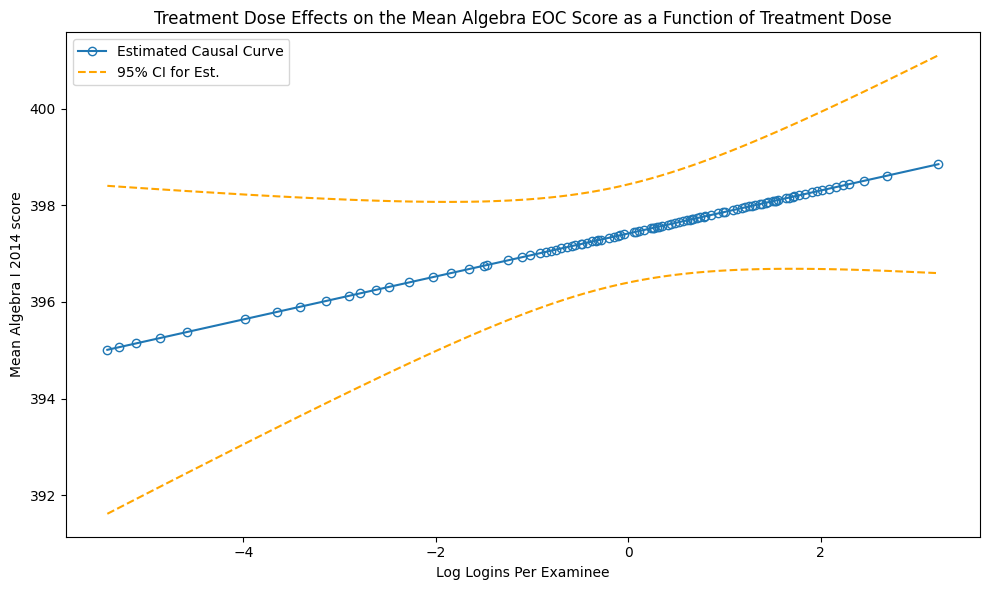

In [31]:
plt.figure(figsize=(10,6))
plt.plot(doseResponse2['logLoginsPerExaminee'],doseResponse2['meanScale2014'], marker='o',label='Estimated Causal Curve', fillstyle = None,markerfacecolor='none')
plt.plot(doseResponse2['logLoginsPerExaminee'],doseResponse2['lowerCL'], ls = '--', color = "orange", label = "95% CI for Est.")
plt.plot(doseResponse2['logLoginsPerExaminee'],doseResponse2['upperCL'], ls = '--', color = "orange")
plt.xlabel("Log Logins Per Examinee")
plt.ylabel("Mean Algebra I 2014 score")
plt.title("Treatment Dose Effects on the Mean Algebra EOC Score as a Function of Treatment Dose")
plt.legend()
plt.tight_layout()
plt.savefig("images/Dose2.png", format="png", dpi=300)
plt.show()